<a href="https://colab.research.google.com/github/idanHur/Computer_Vision_EX1/blob/main/Computer_Vision_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Dataset Preprocessing

---


*   A good dataset is a key for successful model training.

*   This assignment guides you how to create two labeled datasets, which could later be used for
supervised learning.

---

## Overview

Image augmentations are used to increase the variability and robustness of a dataset

## Goals - Create a larger dataset from a smaller one



---


### Goals
1. 

  *   The original MNIST dataset includes images of single digits, in ten classes.
  *   Your goal is to create a new three-digit image dataset, with 101 classes, based on the original MNIST dataset.
2. 

  *   Create a dataset of shape images with three classes: (Triangle, Rectangle and Circle/Elipse)


---

### Tasks

1 - MNIST</br>
*  Download the mnist data usin the code snippet below </br> 
<code> import torchvision </br>
mnist_data = torchvision.datasets.MNIST(root='', download=True) </br>
this downloads the data to root ('') folder. Change the root to a convenient location. </code>
*  Show at least 5 samples of each class (0-9). Always add proper titles and choose the correct color
map
* Your new dataset should include the three-digits numbers: [000, 001, ..., 055, ..., 099, 100],
forming 101 classes. </br>
* Each class should have at least 4000 different samples. </br>
* Use the augmentations you created on lab 3 on your new dataset and show some results and
explain which augmentations are applicable to this specific dataset, which are not and why. </br>
* Each student should add about 10 new augmentations (you may use OpenCV). The total number
of augmentations will be 15. </br>
* Display typical results of your dataset, demonstrating the variability of the new dataset. </br>
* Write a detailed summary of your work.

2 - Shapes Dataset
* Shapes definition and functions requirements:
  * Minimal and maximal area: 100-600 pixels, the shape could not be cropped by image
boundaries.
  * Each shape will have random size, location, orientation and color.
  * Each image will include one of the following shapes:
    * Triangle
    * Rectangle
    * Circle/Elipse
  * Each image should be of dimensions 50x50x3.
  * Create at least 300 different samples of each class i.e.(circles with different radius, etc..)
  * Show the images you created without augmentations and with the augmentations from lab 3
  * Write a class, which loads the data you created, labels the data, i.e (triangle will be class 0,
rectangle 1, etc.. an Integer) and splits it to train and test sets. 90% of the data should be train
images and 10% test images. The class call should be as follows: 


3 - Summary
  * Write a short summary of everything you've done in this work


In [ ]:
# imports 
# Add the missing imports.
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random
import math
from PIL import Image, ImageFilter
import cv2
from scipy.signal import  convolve2d
import uuid
import os

In [ ]:
mnist_data = torchvision.datasets.MNIST(root='', download=True, train=True);

In [ ]:
# Acessing the data within
images = mnist_data.data.numpy()
labels = mnist_data.targets.numpy()
print(images.shape) #60K Images with Dimension 28X28
print(f"There are {len(mnist_data.classes)} which are {mnist_data.classes}")

(60000, 28, 28)
There are 10 which are ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Text(0.5, 1.0, 'Label = 4')

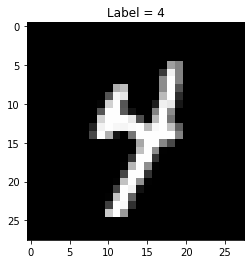

In [ ]:
# Plot a random num
plt.rcParams["figure.figsize"] = (8, 4)
rand_indx = np.random.randint(len(images))
plt.imshow(images[rand_indx], cmap="gray")
plt.title(f"Label = {labels[rand_indx]}")

In [ ]:
indexs = np.fromiter(range(len(images)),int)
imgs_by_class = [images[labels == i] for i in range(len(mnist_data.classes))]#mapping each img to a fitting array of same type of imgs 
imgs_by_class = np.array(imgs_by_class)# nparray of class 0-9 and inside each img is a diffrent 2d np array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
imgs_by_class.shape

(10,)

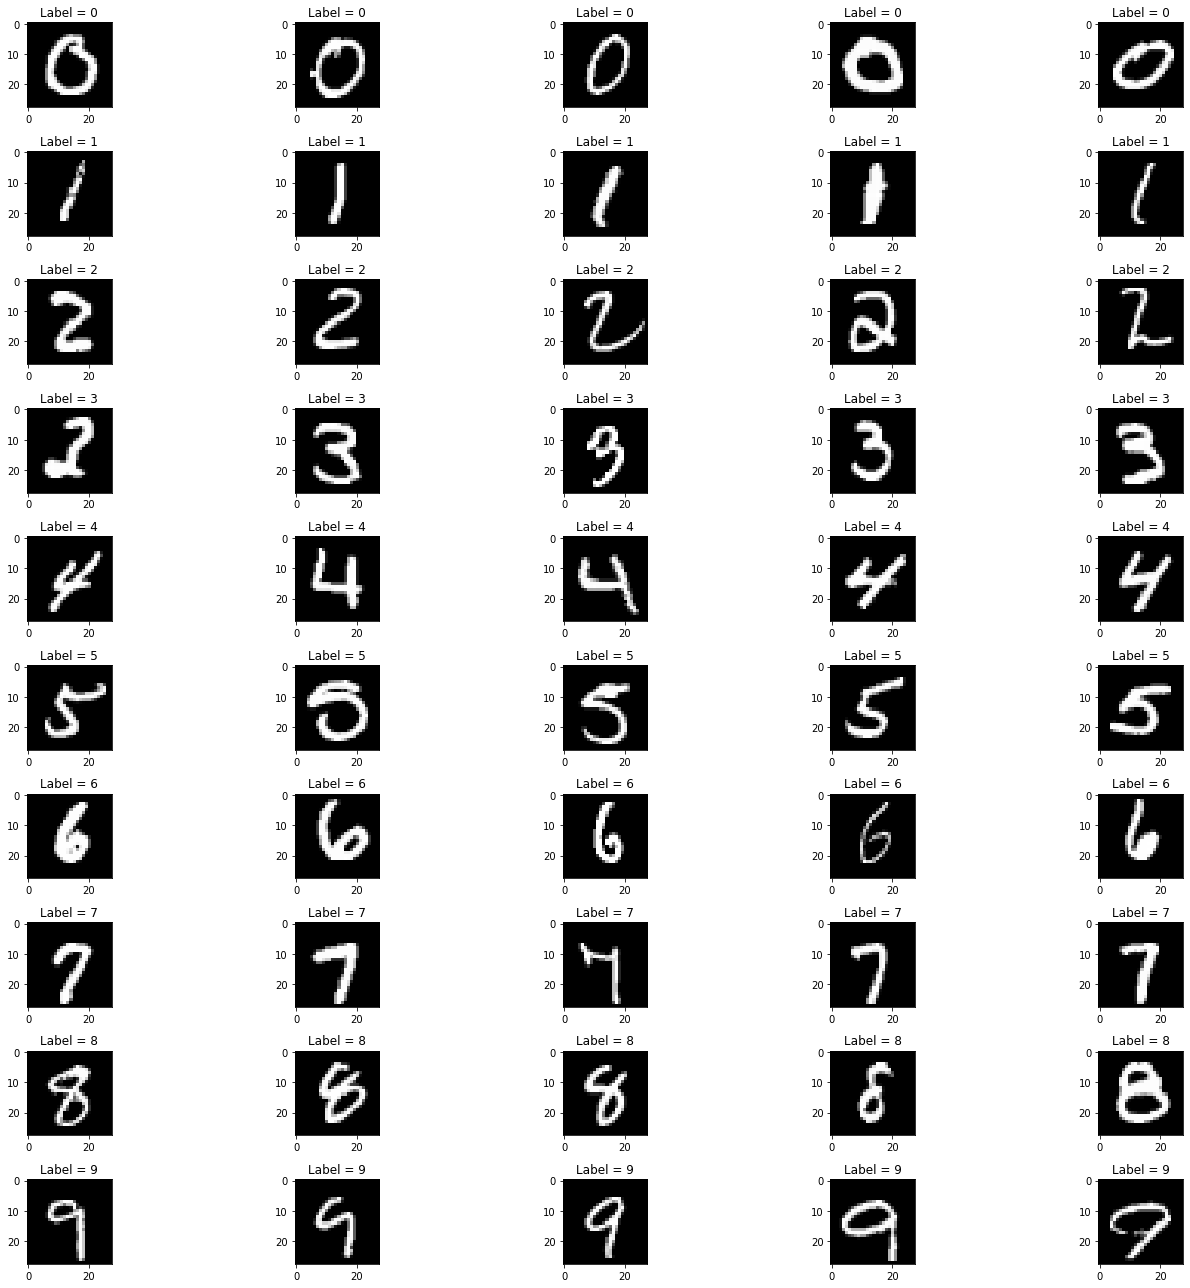

In [ ]:
x = 0
fig,ax = plt.subplots(10,5,figsize = (20,18))
ax = ax.ravel()
for class_indexs in range(len(imgs_by_class)): #take array of img class 
  for i in range(5):# 5 imgs from every class
    pos =random.randint(0, len(imgs_by_class[class_indexs]))
    ax[x].imshow(imgs_by_class[class_indexs][pos],cmap = 'gray')
    ax[x].set_title(f"Label = {class_indexs}")
    x += 1
plt.tight_layout()
plt.show()





In [ ]:
# 16 * 16 * 16 = 4096 for each class of 3 digit number
my_data_set = [list() for i in range(101)]# new list of 101 lists 1 for each 3 digit num
x = 0
for first in range(2): #go only on 0 or 1
    for secand in range(len(mnist_data.classes)):
        for third in range(len(mnist_data.classes)):
          num_str = str(first) + str(secand) + str(third)
          if not os.path.exists(f'./digit_samples/3digits/{num_str}'):
            os.makedirs(f'./digit_samples/3digits/{num_str}')
          for i, j, k in product(range(16), repeat=3): # each one of first, secand and third are paird with 16 difrent variation of each other to make 16*16*16 =4096 diffrent samples
                                                        #i,j,k change the img but not the class of the img
                if not(first == 1 and (secand > 0 or third > 0)):
                  img_tuple = (imgs_by_class[first][i], imgs_by_class[secand][j], imgs_by_class[third][k]) #make tupple of 3 images
                  img = np.concatenate(img_tuple, axis=1)#make 3 digit image from 3 images of 1 digit
                  my_data_set[x].append(img)#put image in array
                  if not os.path.exists(f'./digit_samples/3digits/{num_str}'):
                    cv2.imwrite(f'./digit_samples/3digits/{num_str}/{uuid.uuid4()}.jpeg', img)#save image to diractory       
          x +=1

# Lab 3 augmentations 

In [ ]:
#Crop
def crop(img, x1: int,y1: int, x2: int, y2: int) -> np.ndarray:
    y = img.shape[0]
    x = img.shape[1]
    res = img[x1:x2, y1:y2]
    res = cv2.resize(res,(x,y))
    return res

In [ ]:
#Sharpening
def sharpen(img, depth: int = -1, kernel=None):
    if kernel is None:
        kernel = np.array((
	               [0, 1, 0],
	               [1, -4, 1],
	               [0, 1, 0]), dtype="int") 
    res = img + convolve2d(img, kernel, 'same')
    return res

In [ ]:
#Gaussian-Blur
def get_gaussian_filter(kernel_size , sigma, sig_range=1):
  vals = np.linspace(-sig_range,sig_range,kernel_size)
  xx, yy = np.meshgrid(vals,vals)
  res = (np.e ** (- (xx * xx + yy * yy)/(2*(sigma**2) ))) / (2 * np.pi * (sigma ** 2)) 
  return res

def My_Gaussian_Blur(img, kernel_size , sigma, sig_range=1):
  gaussian_filter = get_gaussian_filter(kernel_size, sigma, sig_range)
  return convolve2d(img, gaussian_filter, mode='same')

In [ ]:
#Flip Vertically or Horizontally (randomly each call)
def random_flip(img):
  return cv2.flip(img, random.randint(0, 2))  # axis = 0 or 1 randomly

In [ ]:
def new_rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    h = img.shape[0]
    w =img.shape[1]

    res_img = np.zeros(img.shape)
    mid_y = h//2
    mid_x = w//2
    angle = np.deg2rad(angle)
    for y in range(h):
      for x in range(w):
        n_x = ((x - mid_x) * np.cos(angle) - (y - mid_y) * np.sin(angle) + mid_x).astype(int)
        n_y = ((y - mid_y) * np.cos(angle) + (x - mid_x) * np.sin(angle) + mid_y).astype(int)
        if (w > n_x and (n_x > 0)) and (h > n_y and (n_y > 0)):
          res_img[y,x] = img[n_y, n_x]
        else:
          continue
    return res_img

In [ ]:
def lab3_aug(img: np.ndarray, i: int = 0):
  if i == 0:
    img = random_flip(img)
  elif i == 1:
    img = new_rotate_image(img, random.randint(10,180))
  elif i == 2:
    img = My_Gaussian_Blur(img, 51, random.uniform(0.01, 0.3))
  elif i == 3:
    img = sharpen(img)
  elif i == 4:
    img = crop(img, random.randint(0,12), random.randint(0,12), random.randint(15,28), random.randint(15,28))
  return img

# Lab 3 augmentations samples

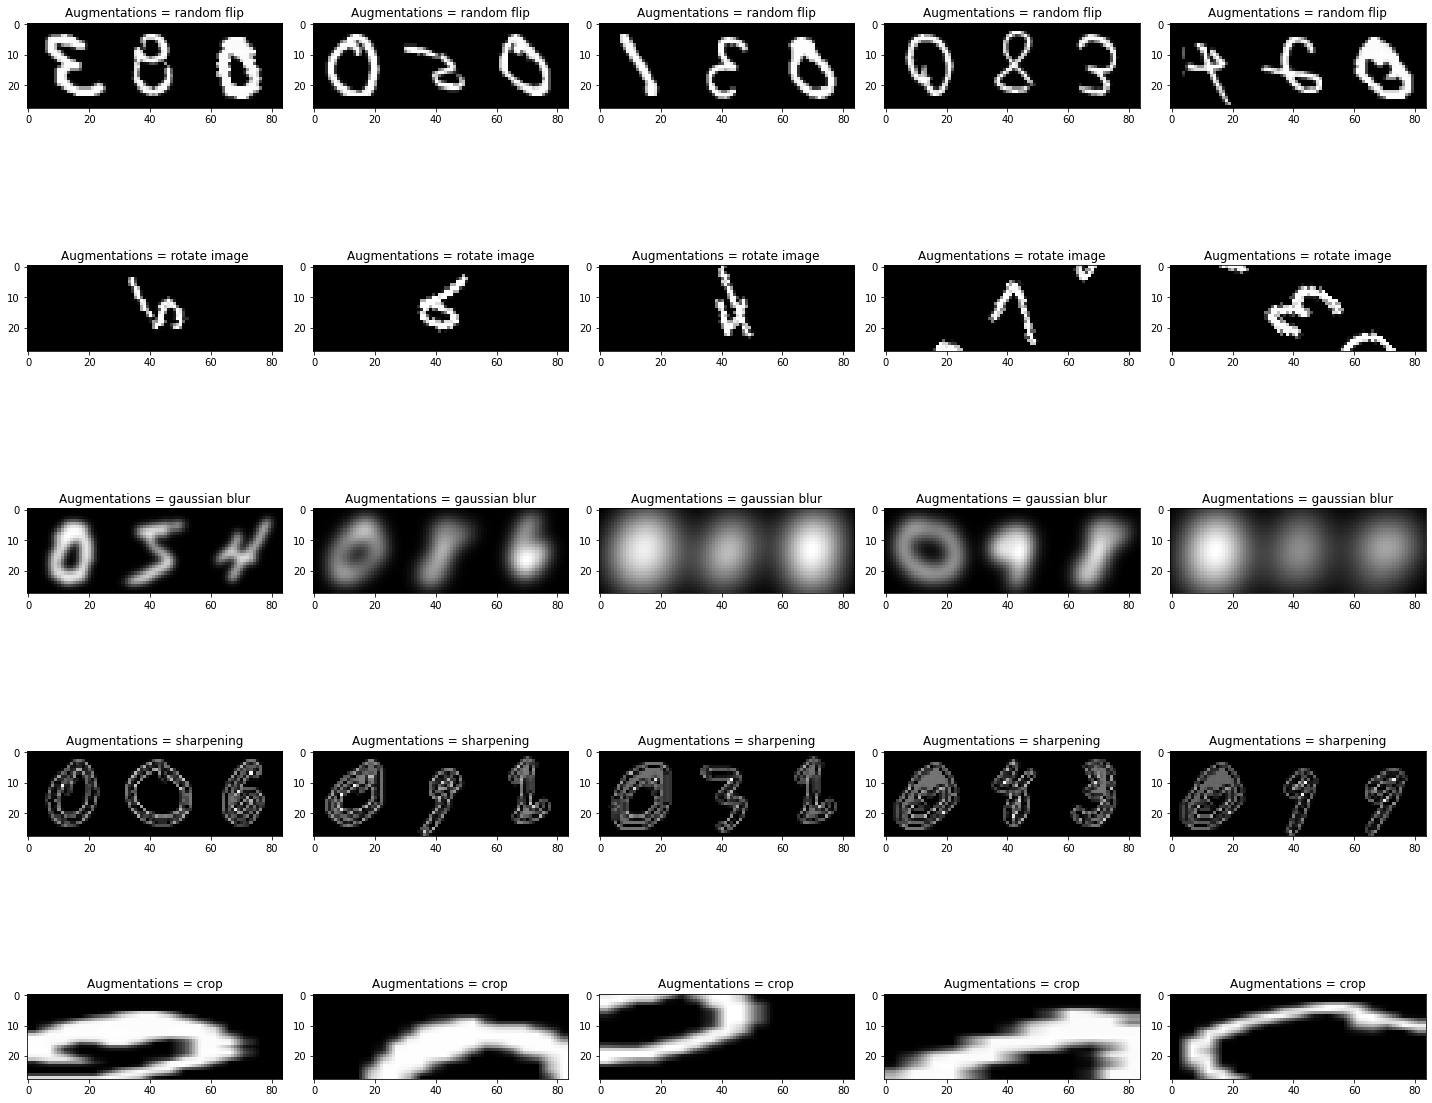

In [ ]:
x = 0
fig,ax = plt.subplots(5,5,figsize = (20,18))
ax = ax.ravel()
aug_name =["random flip", "rotate image", "gaussian blur", "sharpening", "crop"]
for i in range(5):#augmentations num
  for j in range(5):# 5 imgs for every augmentations
    class_num = random.randint(0,100)
    pos =random.randint(0, len(my_data_set[class_num]))
    img = my_data_set[class_num][pos]
    img = lab3_aug(img, i)
    if i ==3:
      img = abs(img)#abs bc lapsican sharpening
    ax[x].imshow(img, cmap = 'gray')
    ax[x].set_title(f"Augmentations = {aug_name[i]}")

    x += 1
plt.tight_layout()
plt.show()



# conclusions
as we can see some augmentations arent aplicable to our detaset:
1. random flip- we could have problams with this augmentation because some numbers will look the same.
for example: if we will take the number 100 and we will do horizantal flip it will look as 001 (only for some samples of the number 1 that look like this -> '|')
2. rotate image: we will have a problam with this augmentation depending on the angle of the rotation, becouse if the image will rotate off the grid this function will cut it off and we will lose parts of our number.
there are 2 options to solve this:

  1.we can do a light angle that wont cause the image to cut off (could be difficult becouse if some images numbers are in diffrent positions it will cause problams).
  2.we can use a rotate functions that dont cut the image if it rotate off the grid (the make the original image smaller and just add padding on the sides).
3. guassian blur- we can use this augmentation as long as our sigma isnt too big, becouse if our sigma is too big the image will be too blur to see anything off of it and it will lose its meaning.
4. sharpening- we can use this augmentation there arent any problams with this augmentation.
5. crop- this augmentation can cause us problems, it realy depend on the cropping positins, we can cut the image and cause it to be useless.
if we know the number exact locations and send the image with points that dont cause us to cut the image we will be able to use this augmentation. 

# 10 more augmentations 

In [ ]:
# Translate
def img_translate(img: np.ndarray):
  h, w = img.shape[:2]  
  quarter_height, quarter_width = h / 4, w / 4
  mat = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  img_translation = cv2.warpAffine(img, mat, (w, h))
  return img_translation

In [ ]:
#Median Blur
def median_blur(img: np.ndarray, ksize: int = 5):
  img_median = cv2.medianBlur(img, ksize) # Add median filter to image
  return img_median

In [ ]:
#Mode filter
def mode_filter(img: np.ndarray):
  pil_img = Image.fromarray(img)
  filterd = pil_img.filter(ImageFilter.ModeFilter);
  filterd = np.array(filterd)
  return filterd

In [ ]:
#Bilateral Filtering
def bilateral_filtering(img: np.ndarray, d: int = 15, sigma_color: int = 75, sigma_space: int = 75):
  bilateral = cv2.bilateralFilter(img, d, sigma_color, sigma_space)
  return bilateral

In [ ]:
#averaging fillter
def averaging_fillter(img: np.ndarray, ksize: int = 7 ):
  smallBlur = np.ones((ksize, ksize), dtype="float") * (1.0 / (ksize**2))
  blurred_img = convolve2d(img, smallBlur, mode="same")
  resultimage = cv2.filter2D(img, -1, smallBlur)
  return resultimage

In [ ]:
#gray scale to random bgr colors
def gray_to_rand_bgr(img: np.ndarray):
  size = img.shape
  img = 255 * img
  res = img.astype(np.uint8)
  res = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
  res[:,:,0] -= random.randint(0,50)
  res[:,:,1] -= random.randint(0,50)
  res[:,:,2] -= random.randint(0,50)
  res[res < 0] = 0
  return res

In [ ]:
#soble y
def soble_y(img: np.ndarray):
  sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

  sobely_edges =  np.abs(convolve2d(img, sobelY))
  return sobely_edges

In [ ]:
#soble_x
def soble_x(img: np.ndarray):
  sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

  sobelx_edges =  np.abs(convolve2d(img, sobelX))
  return sobelx_edges

In [ ]:
#Canny Edge Detection
def canny_edge(img: np.ndarray, threshold1: int = 100, threshold2: int = 200):
  res = cv2.Canny(img, threshold1 ,threshold2)
  return res

In [ ]:
#brightness
def bright(img: np.ndarray, beta_value: int = -30):
    img_bright = cv2.convertScaleAbs(img, beta=beta_value)
    return img_bright

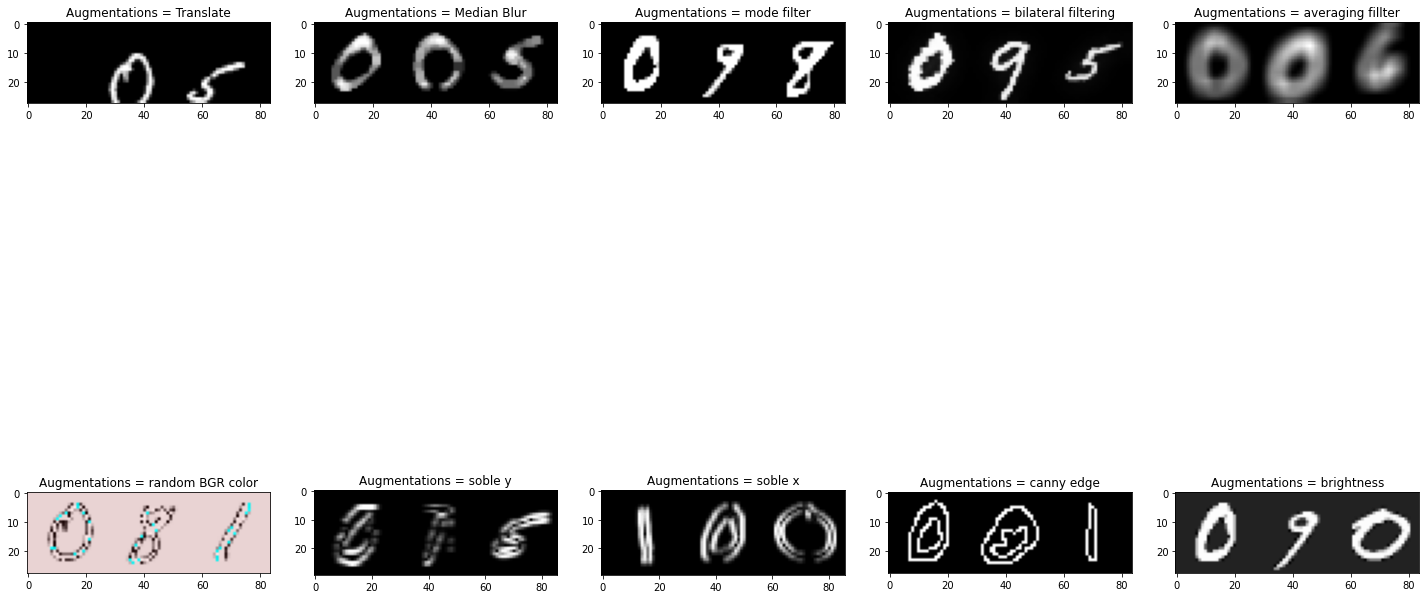

In [ ]:
def rand_img():
  class_num = random.randint(0,100)
  pos =random.randint(0, len(my_data_set[class_num]))
  img = my_data_set[class_num][pos]
  return img

x = 0
fig,ax = plt.subplots(2,5,figsize = (20,18))
ax = ax.ravel()
img = rand_img()
img = img_translate(img)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title(f"Augmentations = {'Translate'}")

img = rand_img()
img = median_blur(img)
ax[1].imshow(img, cmap = 'gray')
ax[1].set_title(f"Augmentations = {'Median Blur'}")

img = rand_img()
img = mode_filter(img)
ax[2].imshow(img, cmap = 'gray')
ax[2].set_title(f"Augmentations = {'mode filter'}")

img = rand_img()
img = bilateral_filtering(img)
ax[3].imshow(img, cmap = 'gray')
ax[3].set_title(f"Augmentations = {'bilateral filtering'}")

img = rand_img()
img = averaging_fillter(img)
ax[4].imshow(img, cmap = 'gray')
ax[4].set_title(f"Augmentations = {'averaging fillter'}")

img = rand_img()
img = gray_to_rand_bgr(img)
ax[5].imshow(img, cmap = 'brg')
ax[5].set_title(f"Augmentations = {'random BGR color'}")

img = rand_img()
img = soble_y(img)
ax[6].imshow(img, cmap = 'gray')
ax[6].set_title(f"Augmentations = {'soble y'}")

img = rand_img()
img = soble_x(img)
ax[7].imshow(img, cmap = 'gray')
ax[7].set_title(f"Augmentations = {'soble x'}")

img = rand_img()
img = canny_edge(img)
ax[8].imshow(img, cmap = 'gray')
ax[8].set_title(f"Augmentations = {'canny edge'}")

img = rand_img()
img = bright(img)
ax[9].imshow(img, cmap = 'gray')
ax[9].set_title(f"Augmentations = {'brightness'}")
plt.tight_layout()
plt.show()

# random images from the new dataset

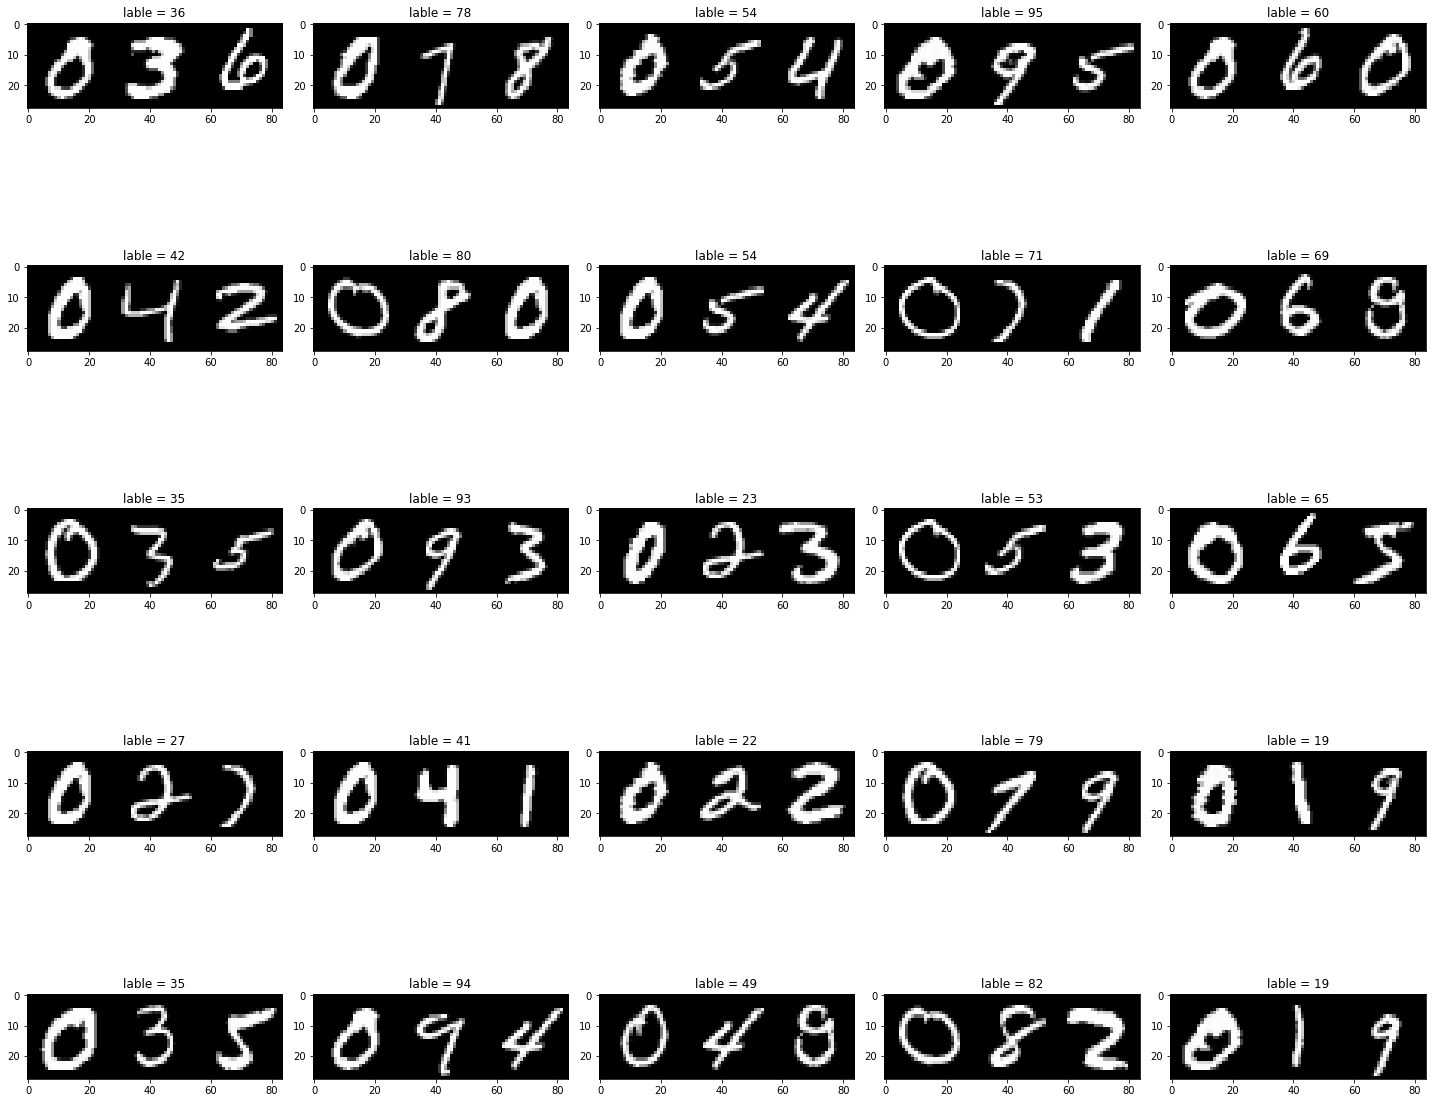

In [ ]:
x = 0
fig,ax = plt.subplots(5,5,figsize = (20,18))
ax = ax.ravel()
for i in range(5):#augmentations num
  for j in range(5):# 5 imgs for every augmentations
    class_num = random.randint(0,100)
    pos =random.randint(0, len(my_data_set[class_num]))
    img = my_data_set[class_num][pos]
    ax[x].imshow(img, cmap = 'gray')
    ax[x].set_title(f"lable = {class_num}")

    x += 1
plt.tight_layout()
plt.show()

# Summery
i downloded the mnist data set as instructed and i created the 101 dataset with 4096 samples for each 3 digit number, i did that by pairing difrent number samples to each other and by that i had created a 3 didgit number and geranted that we dont have the same sample more then once in our dataset.

after that i showed the augmentations that i have implemented in my lab 3 on some samples of the data set.

after that i made another 10 augmentations that i didnt chose implemente in lab 3 and i showed how they affect the images.
some of those augmentations from searching onlines on new augmentations and how to implement them, some i have made up and some we learn in class and i just implemented them.

i also showed some samples of the 101 dataset and we can see none of the images are the same.




# 2.Shapes

In [ ]:
# 2- shapes dataset
def draw_circle( ):
  size = 50 
  radius = random.uniform(100, 600)#size of shape area is between 100-600 pixels
  radius = int(np.sqrt(radius/math.pi)) # calculate radius from area
  img = np.zeros((size, size, 3), dtype = "uint8")
  b = random.randint(1, 255)# make random color for each blue green and red i started random number from 1 only at blue to make sure that at least 1 color wont be 0(i know its unlikely but still) 
  g = random.randint(0, 255)
  r = random.randint(0, 255)
  thickness = random.randint(2, 4)
  center_x = random.randint(1 + radius + thickness, size -(radius + thickness + 1))#find random x,y points for center of cicle in a way the circle wont cut off i added 1 (or reduced in case of end point of rend number) to make sure it wont touch the end of the img
  center_y = random.randint(1 + radius + thickness, size -(radius + thickness +1))
  cv2.circle(img, (center_x, center_y), radius, (b, g, r), thickness)# make circle using cv2 this functin work in bgr colors 
  return img


def draw_Rectangle():
  size = 50 # i gave a little space so it can move better
  area = 0
  thickness = random.randint(1, 2)
  img = np.zeros((size, size, 3), dtype = "uint8")
  b = random.randint(1, 255)# make random color for each blue green and red i started random number from 1 only at blue to make sure that at least 1 color wont be 0(i know its unlikely but still) 
  g = random.randint(0, 255)
  r = random.randint(0, 255)
  while area < 100 or area > 600:
    p1 = (random.randint(2+thickness, 48 -thickness) , random.randint(2+thickness, 48 -thickness))#top left corner vertex
    p2 = (random.randint(2+thickness, 48 -thickness) , random.randint(2+thickness, 48 -thickness))# lower right vertex
    area = abs((p1[0] - p2[0]) * (p1[1] - p2[1])) # calculate area of square we dont know which point has "bigger" cordinet and bc we decres them to find length we need to put abselut on the value 
  cv2.rectangle(img, p1, p2, (b, g, r), thickness)# make circle using cv2 this functin work in bgr colors 
  return img


def draw_Triangle():
  size = 50 
  area = 0
  img = np.zeros((size, size, 3), dtype = "uint8")# make img array
  thickness = random.randint(1, 3)
  while not 100 <= area <= 600: #make sure only triangle with area between 100-600 are created
    p1 = (random.randint(2+thickness, 48 -thickness),random.randint(2+thickness, 48 -thickness))
    p2 = (random.randint(2+thickness, 48 -thickness),random.randint(2+thickness, 48 -thickness))
    p3 = (random.randint(2+thickness, 48 -thickness),random.randint(2+thickness, 48 -thickness))
    l1_len = math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
    l2_len = math.sqrt((p2[0] - p3[0]) ** 2 + (p2[1] - p3[1]) ** 2)
    l3_len = math.sqrt((p1[0] - p3[0]) ** 2 + (p1[1] - p3[1]) ** 2)
    s = (l1_len + l2_len + l3_len) /2 # calculate half of perimeter
    area = math.sqrt(s * (s - l1_len) * (s - l2_len) * (s - l3_len)) # herons formula to calculate triangle area
  b = random.randint(1, 255)# make random color for each blue green and red i started random number from 1 only at blue to make sure that at least 1 color wont be 0(i know its unlikely but still)
  g = random.randint(0, 255)
  r = random.randint(0, 255)
  cv2.line(img, p1, p2, (b, g, r), thickness)#create 3 lines to make triangle using cv2 this functin work in bgr
  cv2.line(img, p2, p3, (b, g, r), thickness)
  cv2.line(img, p1, p3, (b, g, r), thickness)
  return img


# Making shape dataset

In [ ]:
shape_data_set = [list() for i in range(3)]# 3 kinds of shape

class_num = 0
os.makedirs(f'./shapes/{class_num}')#create diractory with class name
for i in range(350):
  img = draw_Triangle()
  shape_data_set[class_num].append(img)#add image to array
  cv2.imwrite(f'./shapes/{class_num}/{uuid.uuid4()}.jpeg', img)#save image to diractory

class_num = 1
os.makedirs(f'./shapes/{class_num}')#create diractory with class name
for i in range(350):
  img = draw_Rectangle()
  shape_data_set[class_num].append(img)#add image to array
  cv2.imwrite(f'./shapes/{class_num}/{uuid.uuid4()}.jpeg', img)#save image to diractory

class_num = 2
os.makedirs(f'./shapes/{class_num}')#create diractory with class name
for i in range(350):
  img = draw_circle()
  shape_data_set[class_num].append(img)#add image to array
  cv2.imwrite(f'./shapes/{class_num}/{uuid.uuid4()}.jpeg', img)#save image to diractory




# Images without augmentations

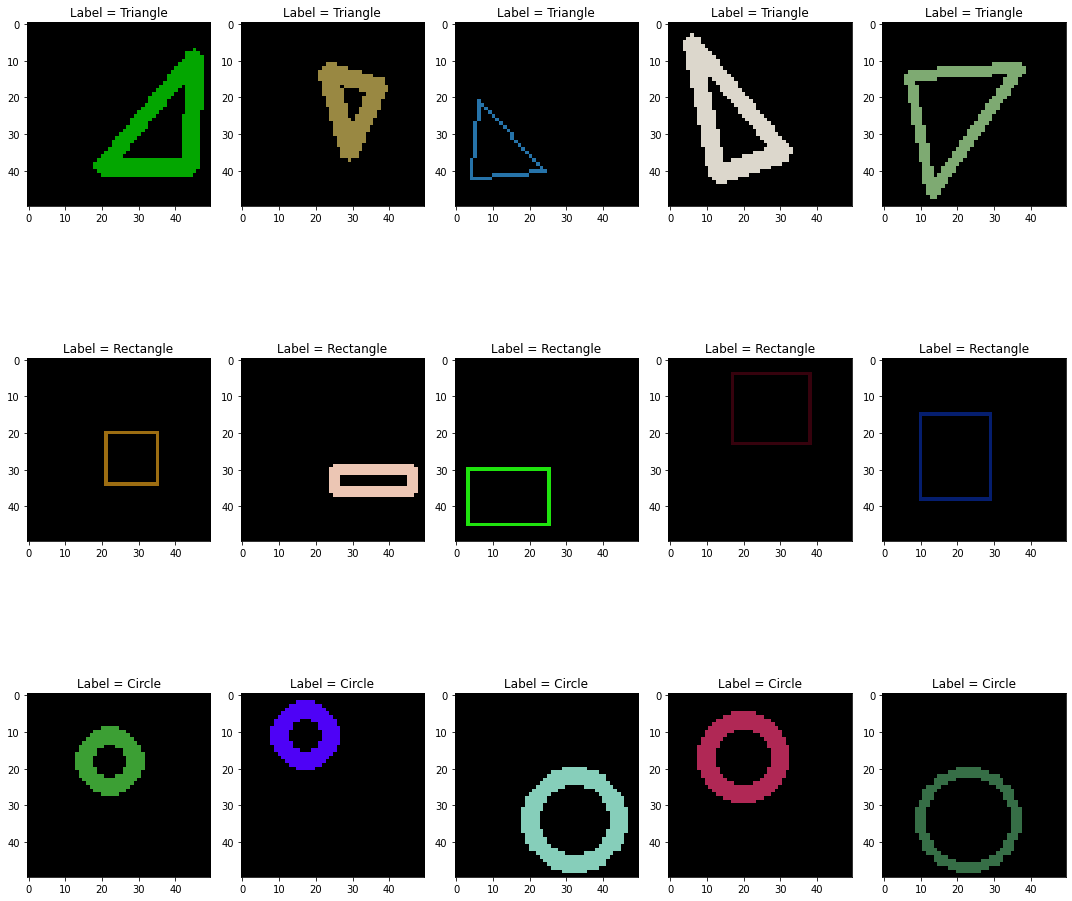

In [ ]:
x = 0
fig,ax = plt.subplots(3,5,figsize = (15,15))
img_array_for_aug =[]
class_name = ["Triangle", "Rectangle", "Circle"]
ax = ax.ravel()
for class_indexs in range(len(shape_data_set)): #take array of img class 
  for i in range(5):# 5 imgs from every class
    pos =random.randint(0, len(shape_data_set[class_indexs]))
    img = shape_data_set[class_indexs][pos]
    img_array_for_aug.append((img, class_name[class_indexs]))
    ax[x].imshow(img,cmap = 'gray')
    ax[x].set_title(f"Label = {class_name[class_indexs]}")
    x += 1
plt.tight_layout()
plt.show()

# # Images with lab3 augmentations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


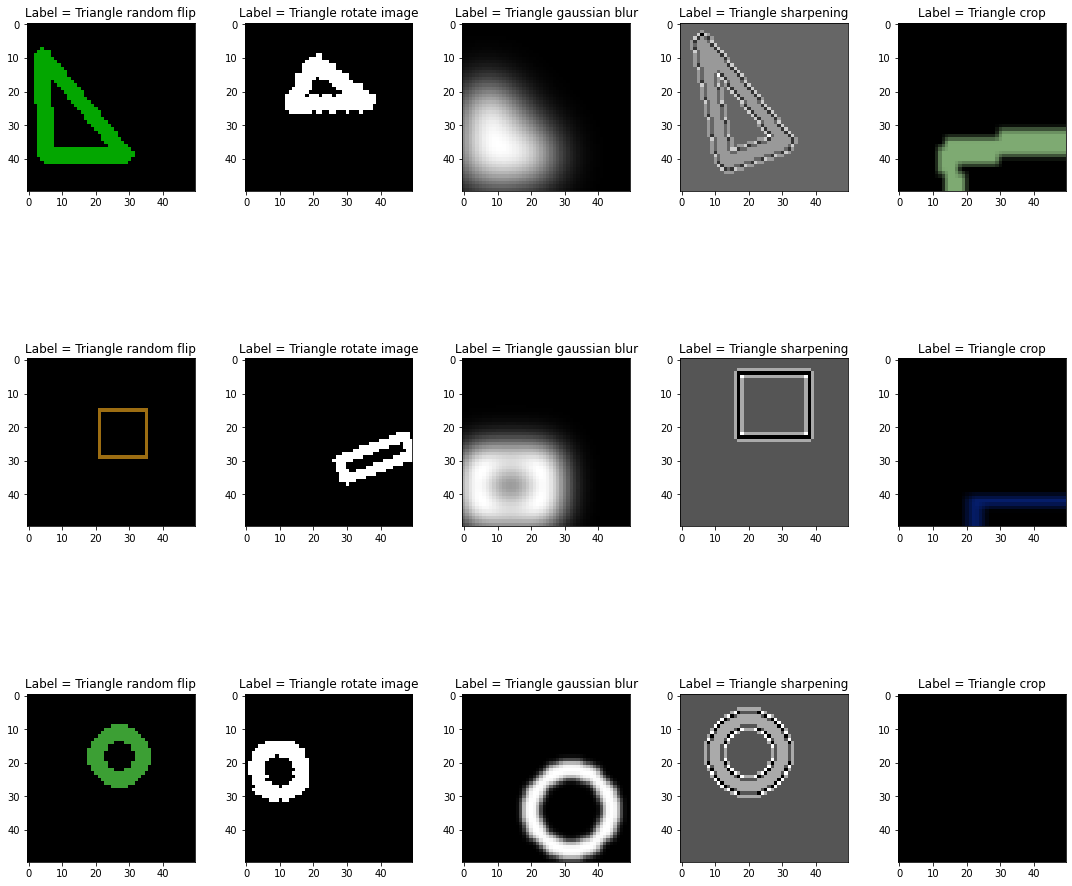

In [ ]:
x = 0
aug_name =["random flip", "rotate image", "gaussian blur", "sharpening", "crop"]
fig,ax = plt.subplots(3,5,figsize = (15,15))
ax = ax.ravel()
for j in range(3): #take array of img class 
  for i in range(5):
    img = img_array_for_aug[x][0]
    if i == 3 or i == 2:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = lab3_aug(img, i)
    ax[x].imshow(img, cmap = 'gray')
    ax[x].set_title(f"Label = {img_array_for_aug[i][1]} {aug_name[i]}")
    x += 1
plt.tight_layout()
plt.show()

# loading dataset class

In [ ]:
class ShapeDataset:

    def __init__(self, shapes_path):
        self.dataset = [(cv2.imread(f'./{shapes_path}/{shape_directory}/{img}', 0),
                         0 if shape_directory == 'circle' else (1 if shape_directory == 'rectangle' else 2))
                        for shape_directory in os.listdir(shapes_path) for img in os.listdir(f'./{shapes_path}/{shape_directory}')]
        self.labels = [data[1] for data in self.dataset]
        self.images = [data[0] for data in self.dataset]
        self.dataset_len = len(self.labels)
        self.shuffled_dataset = random.sample(self.dataset, self.dataset_len) # shuffle the semples randomly 
        self.classes = ['circle - 0', 'rectangle - 1', 'triangle - 2']

    def get_training_set(self):
        return self.shuffled_dataset[:int(0.9 * self.dataset_len)] # return 90% of the list

    def get_testing_set(self):
        return self.shuffled_dataset[int(0.9 * self.dataset_len):] # return 10% of the list

# Work summery
Ive built the 101 dataset from the mnist data set as stated in the last summery

ive implemented some new augmentations and showed how they and also the lab 3 augmentations work on the dataset.

i had showen how the 101 dataset verys and each image is difrent from one another.

in the shape mission i created the shape dataset that includes 350 samples for each lable.

each sample is difrent by color, location in the image and its size and thickness.
ive applied some augmentations on the shape dataset and showed the result.

i also mad a class that load the dataset from a diractory and can split it to 90% train data and 10% test data.

overall i learnd some new things and i fell much more comefterble with things that i had problams with in the begining (numpy vectoryal operations on arrays and etc...).

